# Ejercicio: NLTK Distribución de Frecuencias y Visualizaciones
## Bogdan Kaleb García Rivera MIA-2

__Objetivos__

- Aprender a realizar análisis estadístico de datos no estructurados utilizando FreqDist
- Utilizar seaborn para visualizar los análisis estadísticos que visualicemos

__Desarrollo__

Utilizar el objeto `FreqDis` para hacer análisis estadístico de las mismas evaluaciones que has utilizado en los últimos ejercicios. Intercalar análisis numérico con visualizaciones realizadas con `seaborn` y `matplotlib` para hacer más claros los hallazgos.

Realizar lo siguiente:

1. Tokenizar las evaluaciones y crear una sola lista que contenga todas las palabras en nuestro conjunto de datos.
2. Utilizar el objeto `stopwords` encontrado en la librería `nltk.corpus` para filtrar todas las palabras vacías de tu conjunto de datos y solamente tener palabras relevantes.
3. Crear un objeto `Text` con tu dataset resultante.
4. Crear también un objeto `FreqDist` con el mismo dataset.
5. Obtener las 20 palabras más comunes en el dataset y realizar una gráfica de barras 'verticales' para visualizar su frecuencia.
6. Obtener las 50 palabras más comunes en el dataset y realiza una gráfica de barras 'horizontales' para visualizar su frecuencia.
7. Obtener los 20 bigramas más frecuentes en el dataset y realiza una gráfica de barras 'verticales' para visualizar tu frecuencia.
8. Obter una lista de las palabras que tengan 10 o más caracteres que aparezcan por lo menos 7 veces en el dataset.
9. Realizar un histograma del número de palabras contenidas en cada evaluación.
10. Generar una nube de palabras con tu dataset.

Inicialmente se deben leer los datos 


In [16]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('./data/amazon_fine_food_reviews-clean-regex.csv')
df.head(5) 

,id,product_id,user_id,profile_name,helpfulness_numerator,helpfulness_denominator,score,time,summary,text
0,258510,b00168v34w,a1672lh9s1xo70,lorna j loomis canadian dog fancier,13,14,3,1266796800,misleading refer pods,this coffee does not come individual pods k cu...
1,207915,b000cqid2y,a42cjc66xo0h7,scott schimmel a butterfly dreaming,2,2,5,1279497600,delicious,i little skeptical after looking list ingredie...
2,522649,b007tjgz0y,a16qzbg2un6z3x,toology toology,0,0,5,1335830400,one my favs,gloia jeans butter toffee one my favorite kcup...
3,393368,b000w7puow,a3j21cqzg60k35,hsieh pei hsuan,2,2,5,1265673600,tasty,my families friends love planters peanuts i bo...
4,178178,b002fx2ioq,a1z7xv6ju0ev8m,barbara barbara,1,6,1,1301788800,organic valley white 1 milkfat lowfat milk 8ou...,organic valley white milkfat lowfat milk ounce...


Al igual que el anterior notebook se tuvieron problemas para el uso de la librería NLTK, por lo que se tiene lo siguiente para solucionarlo. 

In [17]:
import nltk
from nltk.tokenize import word_tokenize
import os

ruta_descarga = os.path.join(os.getcwd(), 'nltk_data') # Descargar en el directorio actual
nltk.download('punkt_tab', download_dir=ruta_descarga)
nltk.download('stopwords',download_dir=ruta_descarga)

# Agregar la ruta de descarga 
nltk.data.path.append(ruta_descarga)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/bogdanrivera/Escritorio/pr2-1-ejercicios-
[nltk_data]     notebooks-BogdanRivera/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bogdanrivera/Escritorio/pr2-1-ejercicios-
[nltk_data]     notebooks-BogdanRivera/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1. Tokenizar las evaluaciones y crear una sola lista que contenga todas las palabras en nuestro conjunto de datos.


In [18]:
from nltk.text import Text
from nltk.corpus import stopwords

df['tokens'] = df['text'].apply(word_tokenize) #Aplica tokenización a la columna de texto
all_words = [x for sublista in df['tokens'] for x in sublista] #Obtiene únicamente las palabras individuales

# Crear un objeto nltk.Text
nltk_text = Text(all_words)
print("Longitud del número de palabras: ",len(nltk_text))

Longitud del número de palabras:  830450


In [19]:
df.head()

,id,product_id,user_id,profile_name,helpfulness_numerator,helpfulness_denominator,score,time,summary,text,tokens
0,258510,b00168v34w,a1672lh9s1xo70,lorna j loomis canadian dog fancier,13,14,3,1266796800,misleading refer pods,this coffee does not come individual pods k cu...,"[this, coffee, does, not, come, individual, po..."
1,207915,b000cqid2y,a42cjc66xo0h7,scott schimmel a butterfly dreaming,2,2,5,1279497600,delicious,i little skeptical after looking list ingredie...,"[i, little, skeptical, after, looking, list, i..."
2,522649,b007tjgz0y,a16qzbg2un6z3x,toology toology,0,0,5,1335830400,one my favs,gloia jeans butter toffee one my favorite kcup...,"[gloia, jeans, butter, toffee, one, my, favori..."
3,393368,b000w7puow,a3j21cqzg60k35,hsieh pei hsuan,2,2,5,1265673600,tasty,my families friends love planters peanuts i bo...,"[my, families, friends, love, planters, peanut..."
4,178178,b002fx2ioq,a1z7xv6ju0ev8m,barbara barbara,1,6,1,1301788800,organic valley white 1 milkfat lowfat milk 8ou...,organic valley white milkfat lowfat milk ounce...,"[organic, valley, white, milkfat, lowfat, milk..."


2. Utilizar el objeto `stopwords` encontrado en la librería `nltk.corpus` para filtrar todas las palabras vacías de tu conjunto de datos y solamente tener palabras relevantes.

In [20]:
english_stop_words = stopwords.words('english') # Únicamente stopwords en inglés 
all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]
print("Número de palabras reelevantes: ",len(all_words_except_stop_words))

Número de palabras reelevantes:  571424


3. Crear un objeto `Text` con tu dataset resultante.

In [21]:
filtered_text = Text(all_words_except_stop_words)

4. Crear también un objeto `FreqDist` con el mismo dataset.


In [22]:
freq_dist = nltk.FreqDist(all_words_except_stop_words)
freq_dist

FreqDist({'like': 6229, 'good': 5007, 'taste': 4208, 'coffee': 4162, 'one': 4134, 'great': 4005, 'product': 3658, 'tea': 3530, 'flavor': 3494, 'love': 3194, ...})

5. Obtener las 20 palabras más comunes en el dataset y realizar una gráfica de barras 'verticales' para visualizar su frecuencia.

[['like' '6229']
 ['good' '5007']
 ['taste' '4208']
 ['coffee' '4162']
 ['one' '4134']]


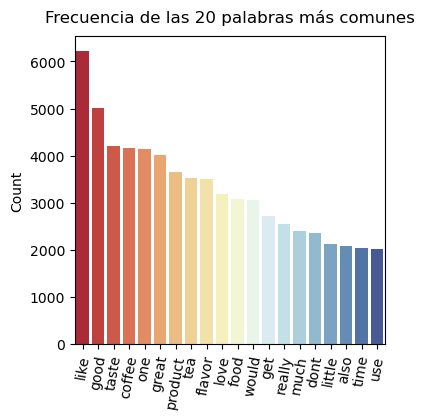

In [23]:
most_common_words_20 = np.array(list(map(lambda x: list(x), freq_dist.most_common(20))))
print(most_common_words_20[:5])

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot()

sns.barplot(x=most_common_words_20[:, 0], y=most_common_words_20[:, 1].astype(int), ax=ax, palette='RdYlBu', hue=most_common_words_20[:,0], legend=False);
ax.set_title('Frecuencia de las 20 palabras más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

6. Obtener las 50 palabras más comunes en el dataset y realiza una gráfica de barras 'horizontales' para visualizar su frecuencia.

Text(0.5, 0, 'Count')

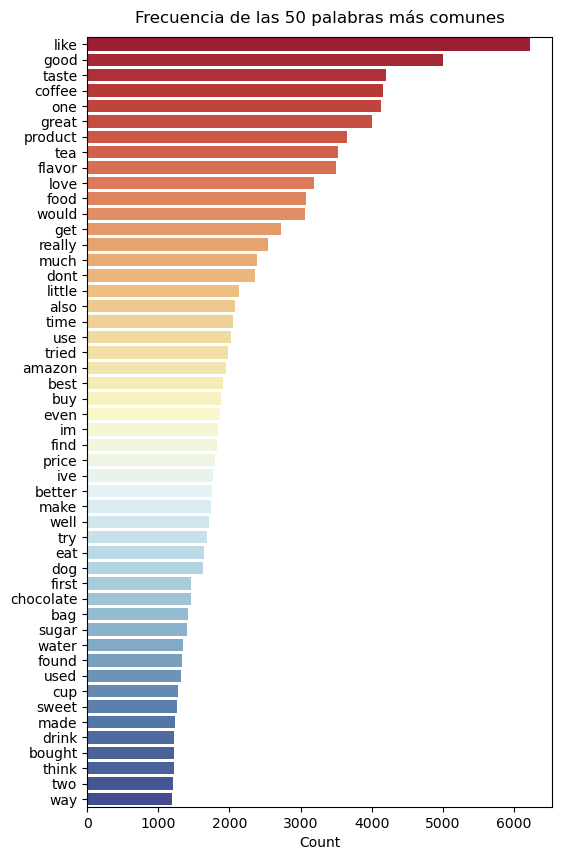

In [24]:
most_common_words_50  = np.array(list(map(lambda x: list(x), freq_dist.most_common(50))))


fig = plt.figure(figsize=(6, 10))
ax = fig.add_subplot()

sns.barplot(x=most_common_words_50[:, 1].astype(int), y=most_common_words_50[:, 0], ax=ax, palette='RdYlBu', hue=most_common_words_50[:,1], legend=False, orient='h');
ax.set_title('Frecuencia de las 50 palabras más comunes', pad=10)
ax.set_xlabel('Count')

7. Obtener los 20 bigramas más frecuentes en el dataset y realiza una gráfica de barras 'verticales' para visualizar tu frecuencia.


In [25]:
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(nltk_text)))
freq_dist_bigrams


FreqDist({('i', 'have'): 3076, ('if', 'you'): 1766, ('i', 'love'): 1352, ('so', 'i'): 1273, ('when', 'i'): 1221, ('i', 'would'): 1158, ('i', 'can'): 1027, ('i', 'had'): 961, ('i', 'dont'): 951, ('it', 'i'): 909, ...})

In [26]:
df_most_common_20 = pd.DataFrame(freq_dist_bigrams.most_common(20))
df_most_common_20.columns = ["bigrams", "freq"]
df_most_common_20["bigrams"] = df_most_common_20["bigrams"].apply(lambda x: ' '.join(map(str, x)))
df_most_common_20.head(10)

,bigrams,freq
0,i have,3076
1,if you,1766
2,i love,1352
3,so i,1273
4,when i,1221
5,i would,1158
6,i can,1027
7,i had,961
8,i dont,951
9,it i,909


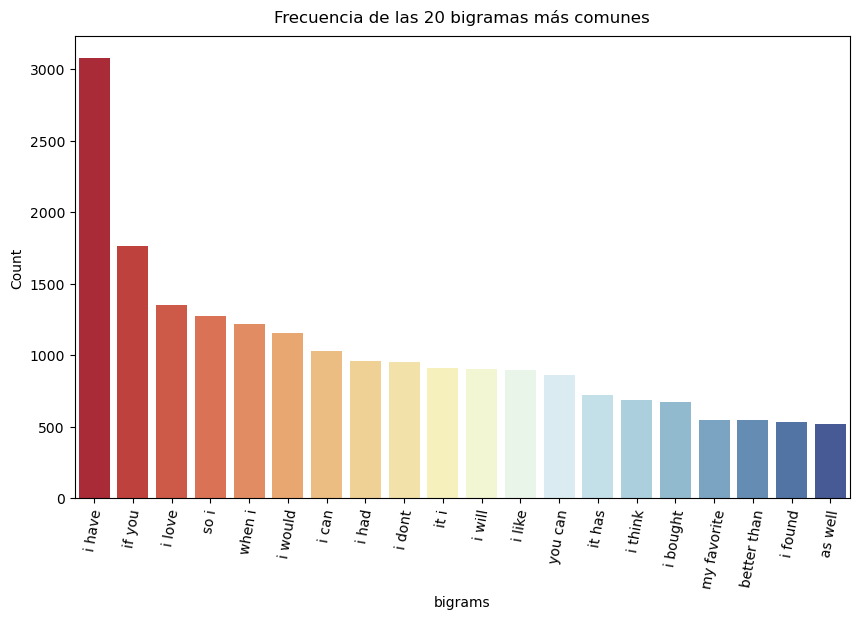

In [27]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(data=df_most_common_20, x="bigrams", y="freq", ax=ax, palette='RdYlBu', hue="bigrams", legend=False);
ax.set_title('Frecuencia de las 20 bigramas más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

8. Obter una lista de las palabras que tengan 10 o más caracteres que aparezcan por lo menos 7 veces en el dataset.

In [28]:
all_most_common_words = np.array(list(map(lambda x: list(x), freq_dist.most_common())))

words = all_most_common_words[:, 0]          # Todas las palabras
frequencies = all_most_common_words[:, 1].astype(int)  # Convierte las frecuencias a enteros


long_words_type = np.array([len(word) >= 10 for word in words])  

filtered_words = words[long_words_type & (frequencies >= 7) ]

print("Palabras con más de 10 caracteres y frecuencia mayor o igual a 7:", filtered_words.tolist())

Palabras con más de 10 caracteres y frecuencia mayor o igual a 7: ['ingredients', 'definitely', 'disappointed', 'especially', 'absolutely', 'recommended', 'everything', 'aftertaste', 'difference', 'artificial', 'ingredient', 'alternative', 'unfortunately', 'experience', 'convenient', 'completely', 'particular', 'discovered', 'consistency', 'purchasing', 'substitute', 'refreshing', 'immediately', 'satisfying', 'supermarket', 'combination', 'description', 'glutenfree', 'reasonable', 'replacement', 'understand', 'subscription', 'nutritional', 'individual', 'traditional', 'peppermint', 'convenience', 'expiration', 'instructions', 'bitterness', 'overpowering', 'personally', 'pleasantly', 'sweeteners', 'vegetables', 'strawberry', 'directions', 'supplement', 'information', 'nutritious', 'appreciate', 'particularly', 'relatively', 'preservatives', 'cholesterol', 'containers', 'individually', 'apparently', 'restaurant', 'chocolates', 'considering', 'originally', 'additional', 'comparison', 'veg

9. Realizar un histograma del número de palabras contenidas en cada evaluación.

/tmp/ipykernel_3677/1336127657.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


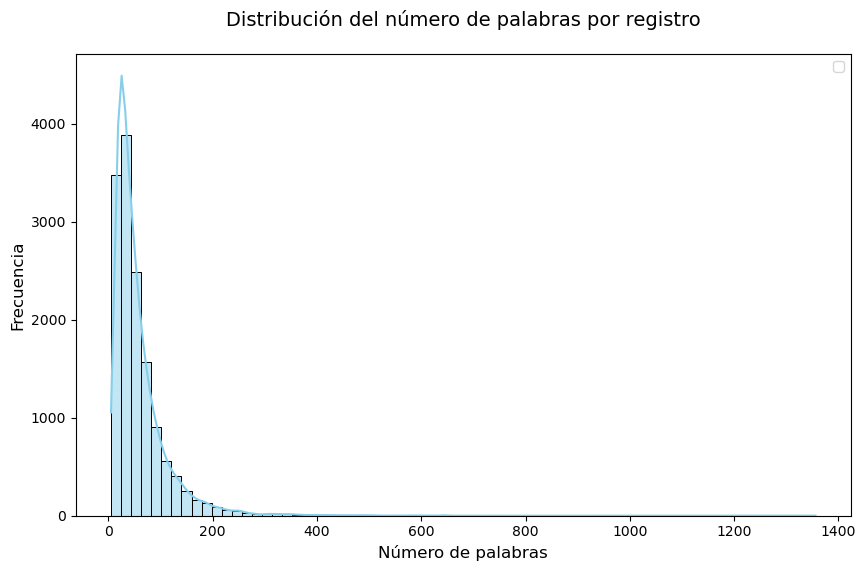

In [29]:
df['num_words'] = df['tokens'].apply(len) #La tokenización se aplica por palabra 

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x='num_words', bins=70, kde=True, color='skyblue')

# Personalizar el gráfico
plt.title('Distribución del número de palabras por registro', pad=20, fontsize=14)
plt.xlabel('Número de palabras', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.show()

10. Generar una nube de palabras con tu dataset.

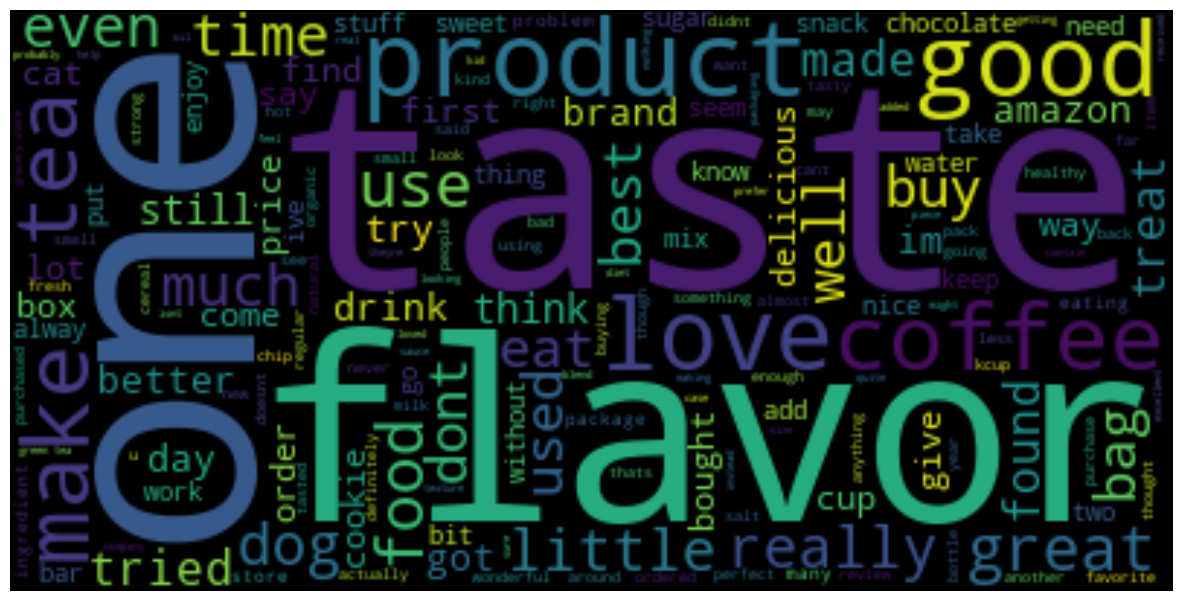

In [30]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=100, background_color="black").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()